# Import data and packages

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
import umap
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.colors as mcolors

RNA = pd.read_csv("data/2.RNA-Seq data.CSV", sep=";")
RNA_Bcells = pd.read_csv("data/RNA_Bcells.csv", index_col=0)

/opt/miniconda3/envs/envBCells1/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Information about the data


In [5]:
RNA.head()

,Unnamed: 0,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,0610005C13Rik,1.096.731.711,1.096.731.711,1.021.750.097,102.181.159,1.205.235.792,1.326.779.959,1.392.995.822,1.821.243.417,1.025.543.402,...,1.025.785.014,1.025.785.014,1.251.081.757,1.147.248.836,1.024.461.573,1.019.656.145,1.017.884.268,1.019.106.789,1.017.884.268,102.471.956
1,0610007P14Rik,2.060.539.867,2.461.053.168,1.924.246.358,2.042.983.576,1.897.591.745,2.101.951.555,1.802.194.401,1.378.025.433,1.394.367.192,...,1.216.034.485,1.051.408.945,1.018.414.626,1.756.207.071,2.804.069.644,2.002.280.289,2.081.718.215,8.857.858.996,1.290.218.737,1.406.557.627
2,0610009B22Rik,7.827.205.873,7.883.703.048,6.884.475.073,7.641.816.858,1.060.856.192,7.750.281.723,6.821.309.233,572.244.261,5.678.748.898,...,8.869.142.564,7.342.365.579,6.888.126.843,6.081.190.673,5.657.801.548,1.003.977.658,3.737.308.029,7.388.846.835,7.719.183.095,8.424.581.587
3,0610009L18Rik,857.715.947,1.679.138.572,155.115.492,1.694.735.423,1.058.370.366,8.664.784.443,2.878.171.712,8.952.120.008,1.187.398.402,...,6.132.817.783,8.965.889.003,4.080.444.548,1.198.740.825,5.627.218.596,4.227.672.505,2.199.351.739,1.460.089.522,2.482.515.881,1.023.994.726
4,0610009O20Rik,168.645.852,1.579.260.221,1.559.416.414,1.862.614.637,1.625.845.558,1.520.880.024,1.630.722.909,1.331.160.831,8.805.298.222,...,1.025.923.988,1.471.393.233,1.309.243.541,1.075.421.425,8.833.833.033,10.077.915,8.644.240.779,1.933.071.751,1.872.127.201,4.546.488.905


In [6]:
RNA.shape

(17535, 87)

In [7]:
RNA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17535 entries, 0 to 17534
Data columns (total 87 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             17535 non-null  object
 1   LTHSC.34-.BM           17535 non-null  object
 2   LTHSC.34+.BM           17535 non-null  object
 3   STHSC.150-.BM          17535 non-null  object
 4   MPP4.135+.BM           17535 non-null  object
 5   proB.CLP.BM            17535 non-null  object
 6   proB.FrA.BM            17535 non-null  object
 7   proB.FrBC.BM           17535 non-null  object
 8   B.FrE.BM               17535 non-null  object
 9   B1b.PC                 17535 non-null  object
 10  B.T1.Sp                17535 non-null  object
 11  B.T2.Sp                17535 non-null  object
 12  B.T3.Sp                17535 non-null  object
 13  B.Sp                   17535 non-null  object
 14  B.Fem.Sp               17535 non-null  object
 15  B.MZ.Sp            

In [8]:
RNA.describe()

,Unnamed: 0,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
count,17535,17535,17535,17535,17535,17535,17535,17535,17535,17535,...,17535,17535,17535,17535,17535,17535,17535,17535,17535,17535
unique,17535,9196,9235,8999,9215,9230,10597,9163,9079,8697,...,10592,10668,8961,8985,9060,9685,8787,9505,10386,10386
top,0610005C13Rik,1.020.794.861,1.021.260.412,1.021.750.097,102.181.159,1.023.170.884,1.021.346.039,1.024.461.573,1.025.832.874,1.025.543.402,...,1.025.785.014,1.025.785.014,102.181.159,1.022.766.826,1.024.461.573,1.019.656.145,1.017.884.268,1.019.106.789,1.017.884.268,1
freq,1,3217,3569,3322,3662,3990,3395,4278,4552,4669,...,4462,4509,3264,3565,4213,3040,2493,2684,2589,343


# Data Clean-up

In [9]:
#coloumns with numerical datas for Clustering
RNA_new = RNA.iloc[:, 1:]
RNA_new.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,1.096.731.711,1.096.731.711,1.021.750.097,102.181.159,1.205.235.792,1.326.779.959,1.392.995.822,1.821.243.417,1.025.543.402,3.383.058.327,...,1.025.785.014,1.025.785.014,1.251.081.757,1.147.248.836,1.024.461.573,1.019.656.145,1.017.884.268,1.019.106.789,1.017.884.268,102.471.956
1,2.060.539.867,2.461.053.168,1.924.246.358,2.042.983.576,1.897.591.745,2.101.951.555,1.802.194.401,1.378.025.433,1.394.367.192,1.383.349.648,...,1.216.034.485,1.051.408.945,1.018.414.626,1.756.207.071,2.804.069.644,2.002.280.289,2.081.718.215,8.857.858.996,1.290.218.737,1.406.557.627
2,7.827.205.873,7.883.703.048,6.884.475.073,7.641.816.858,1.060.856.192,7.750.281.723,6.821.309.233,572.244.261,5.678.748.898,4.046.050.707,...,8.869.142.564,7.342.365.579,6.888.126.843,6.081.190.673,5.657.801.548,1.003.977.658,3.737.308.029,7.388.846.835,7.719.183.095,8.424.581.587
3,857.715.947,1.679.138.572,155.115.492,1.694.735.423,1.058.370.366,8.664.784.443,2.878.171.712,8.952.120.008,1.187.398.402,1.672.196.819,...,6.132.817.783,8.965.889.003,4.080.444.548,1.198.740.825,5.627.218.596,4.227.672.505,2.199.351.739,1.460.089.522,2.482.515.881,1.023.994.726
4,168.645.852,1.579.260.221,1.559.416.414,1.862.614.637,1.625.845.558,1.520.880.024,1.630.722.909,1.331.160.831,8.805.298.222,8.740.847.929,...,1.025.923.988,1.471.393.233,1.309.243.541,1.075.421.425,8.833.833.033,10.077.915,8.644.240.779,1.933.071.751,1.872.127.201,4.546.488.905


In [10]:
#which columns are saved as float
float_cols = RNA_new.select_dtypes(include='float64').columns
print(float_cols)

Index([], dtype='object')


In [11]:
#which columns are saved as objects 
obj_cols = RNA_new.select_dtypes(include='object').columns
print(obj_cols)

Index(['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM',
       'proB.CLP.BM', 'proB.FrA.BM', 'proB.FrBC.BM', 'B.FrE.BM', 'B1b.PC',
       'B.T1.Sp', 'B.T2.Sp', 'B.T3.Sp', 'B.Sp', 'B.Fem.Sp', 'B.MZ.Sp',
       'B.Fo.Sp', 'B.mem.Sp', 'B.GC.CB.Sp', 'B.GC.CC.Sp', 'B.PB.Sp', 'B.PC.Sp',
       'B.PC.BM', 'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th',
       'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th', 'T.4.Nve.Sp',
       'T.4.Nve.Fem.Sp', 'T.8.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr',
       'Treg.4.FP3+.Nrplo.Co', 'Treg.4.25hi.Sp', 'T8.TN.P14.Sp',
       'T8.IEL.LCMV.d7.Gut', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp',
       'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp',
       'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d',
       'Tgd.g2+d17.24a+.Th', 'Tgd.g2+d17.LN', 'Tgd.g2+d1.24a+.Th',
       'Tgd.g2+d1.LN', 'Tgd.g1.1+d1.24a+.Th', 'Tgd.g1.1+d1.LN', 'Tgd.Sp',
       'NK.27+11b-.BM', 'NK.27+11b+.BM', 'NK.27-11b+.BM', 'NK.27+11b-.Sp',
       '

In [12]:
#Remove thousand separators and convert data from object to numeric
RNA_num = RNA_new.copy()
RNA_num[obj_cols] = RNA_num[obj_cols].apply(lambda col: col.str.replace('.', '', regex=False).astype(float))
RNA_num.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,1.096732e+09,1.096732e+09,1.021750e+09,1.021812e+08,1.205236e+09,1.326780e+09,1.392996e+09,1.821243e+09,1.025543e+09,3.383058e+09,...,1.025785e+09,1.025785e+09,1.251082e+09,1.147249e+09,1.024462e+09,1.019656e+09,1.017884e+09,1.019107e+09,1.017884e+09,1.024720e+08
1,2.060540e+09,2.461053e+09,1.924246e+09,2.042984e+09,1.897592e+09,2.101952e+09,1.802194e+09,1.378025e+09,1.394367e+09,1.383350e+09,...,1.216034e+09,1.051409e+09,1.018415e+09,1.756207e+09,2.804070e+09,2.002280e+09,2.081718e+09,8.857859e+09,1.290219e+09,1.406558e+09
2,7.827206e+09,7.883703e+09,6.884475e+09,7.641817e+09,1.060856e+09,7.750282e+09,6.821309e+09,5.722443e+08,5.678749e+09,4.046051e+09,...,8.869143e+09,7.342366e+09,6.888127e+09,6.081191e+09,5.657802e+09,1.003978e+09,3.737308e+09,7.388847e+09,7.719183e+09,8.424582e+09
3,8.577159e+08,1.679139e+09,1.551155e+08,1.694735e+09,1.058370e+09,8.664784e+09,2.878172e+09,8.952120e+09,1.187398e+09,1.672197e+09,...,6.132818e+09,8.965889e+09,4.080445e+09,1.198741e+09,5.627219e+09,4.227673e+09,2.199352e+09,1.460090e+09,2.482516e+09,1.023995e+09
4,1.686459e+08,1.579260e+09,1.559416e+09,1.862615e+09,1.625846e+09,1.520880e+09,1.630723e+09,1.331161e+09,8.805298e+09,8.740848e+09,...,1.025924e+09,1.471393e+09,1.309244e+09,1.075421e+09,8.833833e+09,1.007792e+07,8.644241e+09,1.933072e+09,1.872127e+09,4.546489e+09


In [13]:
#Replace infinitive values with NaN
RNA_clean = RNA_num.replace([np.inf, -np.inf], np.nan).dropna()
RNA_clean.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,1.096732e+09,1.096732e+09,1.021750e+09,1.021812e+08,1.205236e+09,1.326780e+09,1.392996e+09,1.821243e+09,1.025543e+09,3.383058e+09,...,1.025785e+09,1.025785e+09,1.251082e+09,1.147249e+09,1.024462e+09,1.019656e+09,1.017884e+09,1.019107e+09,1.017884e+09,1.024720e+08
1,2.060540e+09,2.461053e+09,1.924246e+09,2.042984e+09,1.897592e+09,2.101952e+09,1.802194e+09,1.378025e+09,1.394367e+09,1.383350e+09,...,1.216034e+09,1.051409e+09,1.018415e+09,1.756207e+09,2.804070e+09,2.002280e+09,2.081718e+09,8.857859e+09,1.290219e+09,1.406558e+09
2,7.827206e+09,7.883703e+09,6.884475e+09,7.641817e+09,1.060856e+09,7.750282e+09,6.821309e+09,5.722443e+08,5.678749e+09,4.046051e+09,...,8.869143e+09,7.342366e+09,6.888127e+09,6.081191e+09,5.657802e+09,1.003978e+09,3.737308e+09,7.388847e+09,7.719183e+09,8.424582e+09
3,8.577159e+08,1.679139e+09,1.551155e+08,1.694735e+09,1.058370e+09,8.664784e+09,2.878172e+09,8.952120e+09,1.187398e+09,1.672197e+09,...,6.132818e+09,8.965889e+09,4.080445e+09,1.198741e+09,5.627219e+09,4.227673e+09,2.199352e+09,1.460090e+09,2.482516e+09,1.023995e+09
4,1.686459e+08,1.579260e+09,1.559416e+09,1.862615e+09,1.625846e+09,1.520880e+09,1.630723e+09,1.331161e+09,8.805298e+09,8.740848e+09,...,1.025924e+09,1.471393e+09,1.309244e+09,1.075421e+09,8.833833e+09,1.007792e+07,8.644241e+09,1.933072e+09,1.872127e+09,4.546489e+09


In [14]:
#Use CPM (Counts Per Million) as normalization method
cpm = RNA_num.div(RNA_num.sum(axis=0), axis=1) * 1e6
cpm.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,22.687573,22.690058,20.958102,2.263757,24.845195,27.492223,28.833200,37.383975,21.477871,68.353987,...,21.463695,21.283987,27.822406,23.470152,20.998778,21.359282,20.971594,20.931245,21.249568,2.142564
1,42.625418,50.916224,39.470073,45.260974,39.117687,43.554562,37.303078,28.286207,29.202118,27.950291,...,25.444506,21.815657,22.648196,35.928079,57.476082,41.942835,42.889895,181.929924,26.934880,29.409403
2,161.917723,163.104316,141.214107,169.299487,21.868898,160.593675,141.192220,11.746242,118.929572,81.749609,...,185.579404,152.346556,153.182843,124.407595,115.970110,21.030857,77.000214,151.758155,161.147304,176.147716
3,17.743166,34.739354,3.181723,37.545762,21.817654,179.543097,59.574407,183.756782,24.867587,33.786387,...,128.324092,186.033002,90.743697,24.523563,115.343239,88.559315,45.313512,29.988508,51.825528,21.410480
4,3.488697,32.672991,31.986694,41.265017,33.515806,31.514172,33.753841,27.324235,184.408638,176.607007,...,21.466603,30.529901,29.115847,22.000723,181.070435,0.211107,178.098348,39.703002,39.082925,95.061533


In [15]:
#log2 transformation to stabilize variance 
RNA_noramlized = np.log2(cpm + 1)
RNA_noramlized.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,4.566058,4.566210,4.456681,1.706534,4.691824,4.832496,4.898847,5.262432,4.490434,6.115907,...,4.489523,4.477935,4.849119,4.612951,4.459352,4.482802,4.457568,4.454916,4.475705,1.651942
1,5.447097,5.698114,5.338784,5.531724,5.326167,5.477501,5.259388,4.872149,4.916578,4.855506,...,4.724896,4.511952,4.563658,5.206646,5.869775,5.424346,5.455817,7.515147,4.803996,4.926446
2,7.348000,7.358469,7.151921,7.411930,4.515315,7.336227,7.151699,3.672000,6.906044,6.370681,...,7.543646,7.260652,7.268498,6.970481,6.869996,4.461454,6.285406,7.255106,7.341161,7.468809
3,4.228293,5.159442,2.064098,5.268500,4.512079,7.496199,5.920636,7.529484,4.693074,5.120451,...,7.014847,7.547149,6.519537,4.673758,6.862244,6.484772,5.533361,4.953661,5.723163,4.486102
4,2.166297,5.073520,5.043812,5.401392,5.109185,5.022997,5.119101,4.823965,7.534565,7.472545,...,4.489710,4.978649,4.912451,4.523607,7.508353,0.276327,7.484608,5.347063,5.324916,6.585887


RNA_noramlized ist the dataset we will use for the following analysis. It is the RNA-seq dataset cleaned-up and normalized.

## KMeans Clustering

In [16]:
#Number of clusters ?
K = range(1, 11)
a = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(RNA_noramlized)
    a.append(kmeans.inertia_)

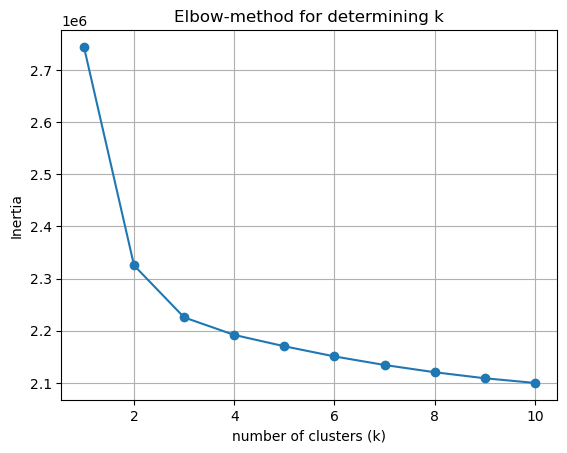

In [17]:
#Elbow-Plot für Clusteranzahl
plt.plot(K, a, marker='o')
plt.xlabel('number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow-method for determining k')
plt.grid(True)
plt.show()

Knick scheint bei 3 zu sein 
->Austesten mit 3 und 4

In [18]:
pca = PCA(n_components=10)
RNA_pca = pca.fit_transform(RNA_noramlized)

In [19]:
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_3.fit(RNA_noramlized)

kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_4.fit(RNA_noramlized)


labels_3 = kmeans_3.labels_
labels_4 = kmeans_4.labels_

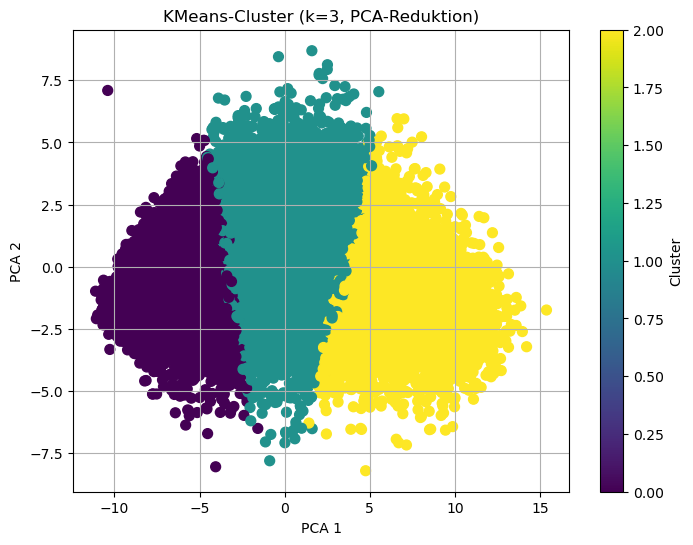

In [20]:
#k=3
plt.figure(figsize=(8,6))
plt.scatter(RNA_pca[:, 0], RNA_pca[:, 1], c=labels_3, cmap='viridis', s=50)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('KMeans-Cluster (k=3, PCA-Reduktion)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

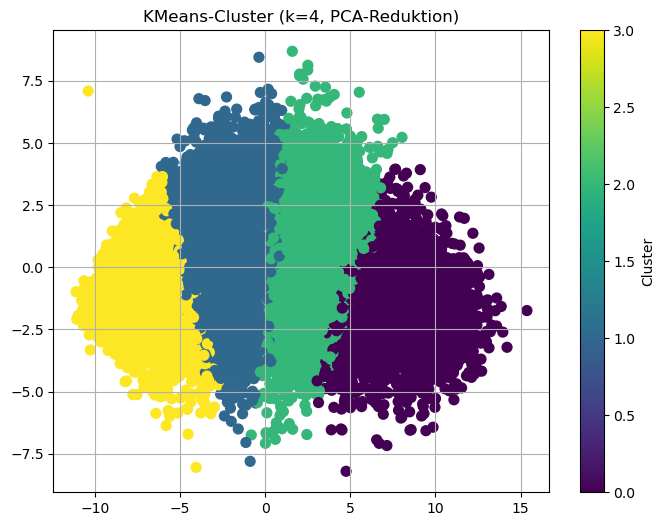

In [21]:
#für k=4
plt.figure(figsize=(8,6))
plt.scatter(RNA_pca[:, 0], RNA_pca[:, 1], c=labels_4, cmap='viridis', s=50)
plt.title('KMeans-Cluster (k=4, PCA-Reduktion)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

The seperation by 3 clusters looks really good, so we will use k=3 in the analysis.

### Palette for lineage mapping for following analysis: celltype_to_lineage and palette

In [22]:
# Load lineage info
qc = pd.read_csv("data/ATAC_QCmatric.csv", sep=";")
qc.columns = qc.columns.str.strip()
qc["CellType"] = qc["CellType"].str.strip()
qc["Lineage"] = qc["Lineage"].str.strip()

# Mapping CellType → Lineage
celltype_to_lineage = qc.drop_duplicates("CellType").set_index("CellType")["Lineage"]

# Farbpalette für Lineages
unique_lineages = sorted(celltype_to_lineage.unique())
palette = dict(zip(unique_lineages, sns.color_palette("Set2", len(unique_lineages))))
palette["Unknown"] = "lightgray"

# 2. Determine the relationship between the chromatin landscape and gene expression

## i. Does clustering of the gene expression matrix show the same relationships between cell types as the ATAC-seq data?

In [23]:
#load the ATAC dataset: columns = cell types, rows=peaks
ATAC_scaled_ct = pd.read_csv("data/ATAC_scaled.ct.csv", sep=",")
ATAC_scaled_ct.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,preB.FrD.BM,B.FrE.BM,B1b.PC,...,DC.8+.Sp,DC.pDC.Sp,DC.103+11b+.SI,DC.103+11b-.SI,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th,peak_mean_signal
0,-0.622619,-0.913335,-0.818014,-0.843321,0.867794,-0.931503,-0.956155,0.241998,-0.977376,-0.882360,...,-0.867550,1.323434,-0.147860,-0.842635,1.530753,-0.931429,-0.984957,1.270846,-0.044332,-0.285864
1,-0.622619,0.737160,-0.818014,-0.843278,-0.960118,-0.931490,-0.956118,-1.104052,-0.977401,-0.882315,...,-0.867550,-0.231432,-0.903931,-0.842659,-0.994405,-0.931381,1.362299,-0.510506,-0.887236,-0.449898
2,0.723878,-0.913378,-0.818014,-0.843321,-0.960118,-0.931503,-0.956135,1.178320,-0.977390,-0.882360,...,-0.867524,0.386909,-0.903904,-0.842659,-0.991005,0.906252,-0.317633,1.234219,-0.887283,-0.567386
3,-0.622619,-0.913378,-0.818063,-0.843321,-0.960101,-0.931487,-0.956135,1.296989,-0.977364,-0.882360,...,0.930837,-1.047119,-0.903951,-0.842611,1.498200,-0.931381,1.603222,1.234219,-0.887283,-0.488935
4,-0.622619,-0.913378,-0.818063,-0.843321,-0.960118,-0.931490,0.543993,1.178320,-0.977390,-0.882334,...,-0.867550,-1.047119,0.710273,-0.842635,-0.994405,-0.931393,-0.317633,0.004627,1.689424,-0.391909


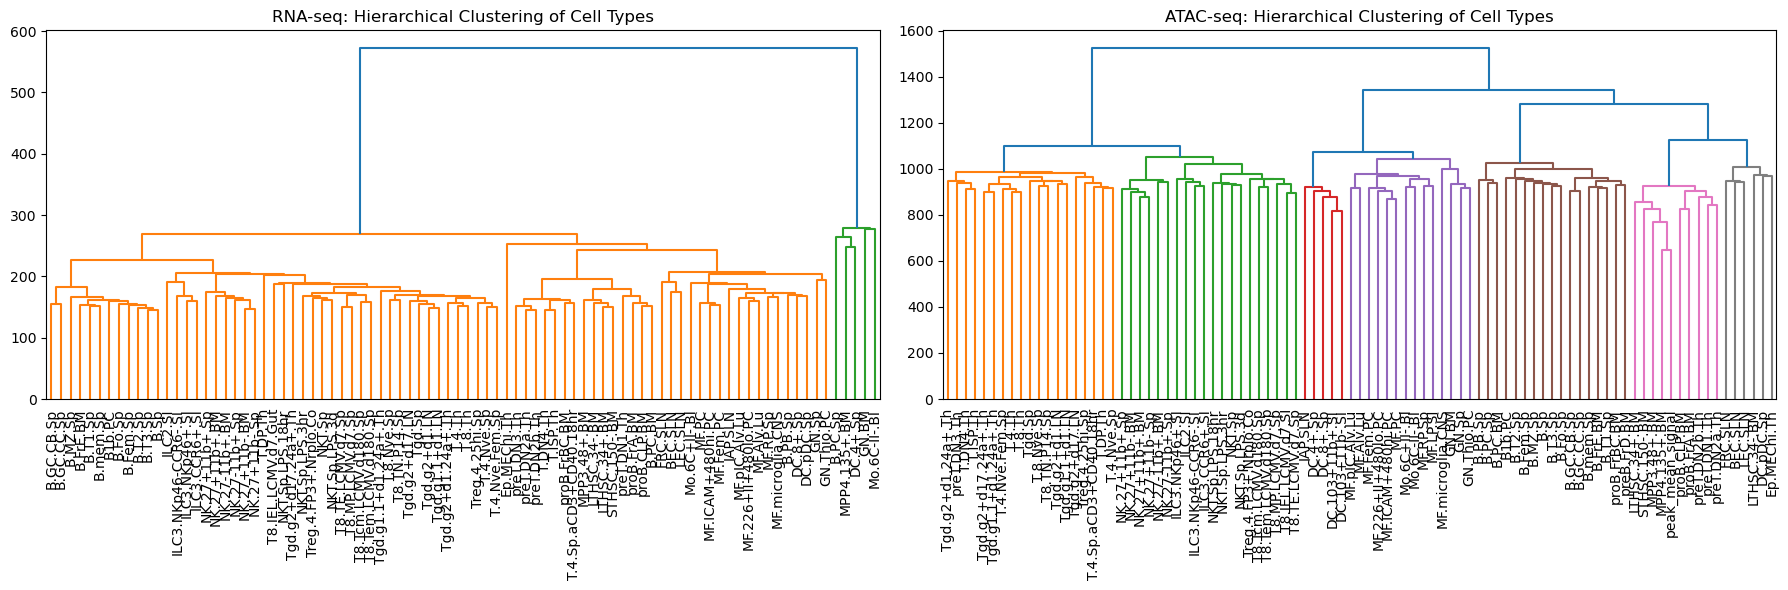

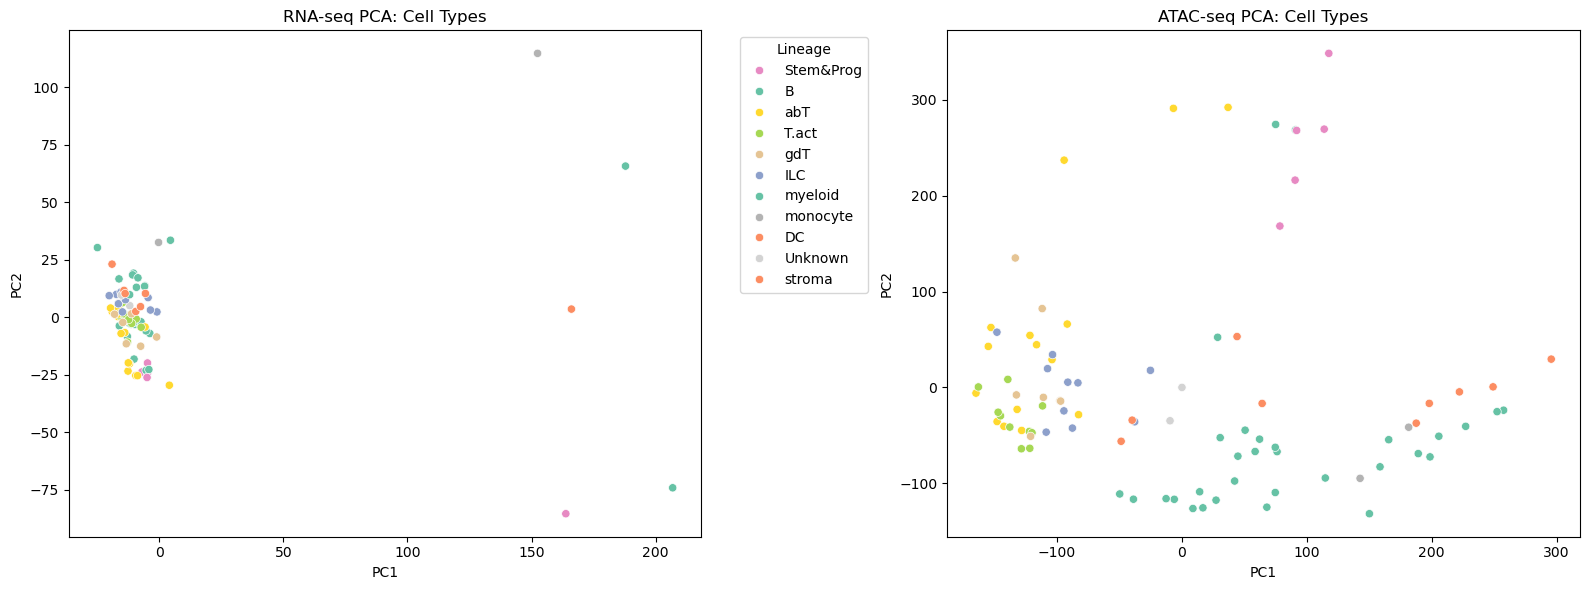

In [24]:
# prepare RNA
rna_by_celltype = RNA_noramlized.T  # CellType × Gene
rna_scaled = StandardScaler().fit_transform(rna_by_celltype)

rna_celltypes = rna_by_celltype.index.tolist()
rna_lineages = [celltype_to_lineage.get(ct, "Unknown") for ct in rna_celltypes]

# prepare ATAC
atac_by_celltype = ATAC_scaled_ct.drop(columns="cluster", errors='ignore').T  # CellType × Peak
atac_celltypes = atac_by_celltype.index.tolist()
atac_lineages = [celltype_to_lineage.get(ct, "Unknown") for ct in atac_celltypes]

# Clustering-Dendrograms 
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

linkage_rna = sch.linkage(pdist(rna_scaled), method="ward")
sch.dendrogram(linkage_rna, labels=rna_celltypes, leaf_rotation=90, leaf_font_size=10, ax=axs[0])
axs[0].set_title("RNA-seq: Hierarchical Clustering of Cell Types")

linkage_atac = sch.linkage(pdist(atac_by_celltype), method="ward")
sch.dendrogram(linkage_atac, labels=atac_celltypes, leaf_rotation=90, leaf_font_size=10, ax=axs[1])
axs[1].set_title("ATAC-seq: Hierarchical Clustering of Cell Types")

plt.tight_layout()
plt.show()

# PCA-Plots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

pca_rna = PCA(n_components=2).fit_transform(rna_scaled)
sns.scatterplot(x=pca_rna[:, 0], y=pca_rna[:, 1],
                hue=rna_lineages, palette=palette, ax=axs[0])
axs[0].set_title("RNA-seq PCA: Cell Types")
axs[0].set_xlabel("PC1")
axs[0].set_ylabel("PC2")

pca_atac = PCA(n_components=2).fit_transform(atac_by_celltype)
sns.scatterplot(x=pca_atac[:, 0], y=pca_atac[:, 1],
                hue=atac_lineages, palette=palette, ax=axs[1])
axs[1].set_title("ATAC-seq PCA: Cell Types")
axs[1].set_xlabel("PC1")
axs[1].set_ylabel("PC2")

# chared legend
handles, labels = axs[1].get_legend_handles_labels()
axs[1].legend_.remove()
axs[0].legend(handles, labels, title="Lineage", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Clustering of RNA expression shows no clear difference between cell types. 

## ii. Can one cluster genes based on their expression profiles?

### a) Can you determine a specific set of genes for your cell lineage?

Sorting data by KMeans gene clusters.

In [25]:
# Define color of cell types 
celltypes = RNA_noramlized.columns
lineages = [celltype_to_lineage.get(ct, "Unknown") for ct in celltypes]
col_colors = pd.Series(lineages, index=celltypes).map(palette)

# Perform KMeans clustering on genes (rows) with k=3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(RNA_noramlized)

# Sort genes by cluster labels for visualization
sorted_indices = cluster_labels.argsort()
RNA_sorted = RNA_noramlized.iloc[sorted_indices]
cluster_labels_sorted = cluster_labels[sorted_indices]

# Create a color palette for gene clusters
gene_palette = sns.color_palette("tab10", k)
gene_colors = [gene_palette[label] for label in cluster_labels_sorted]

#### Heatmap of gene expression sorted by KMeans clusters

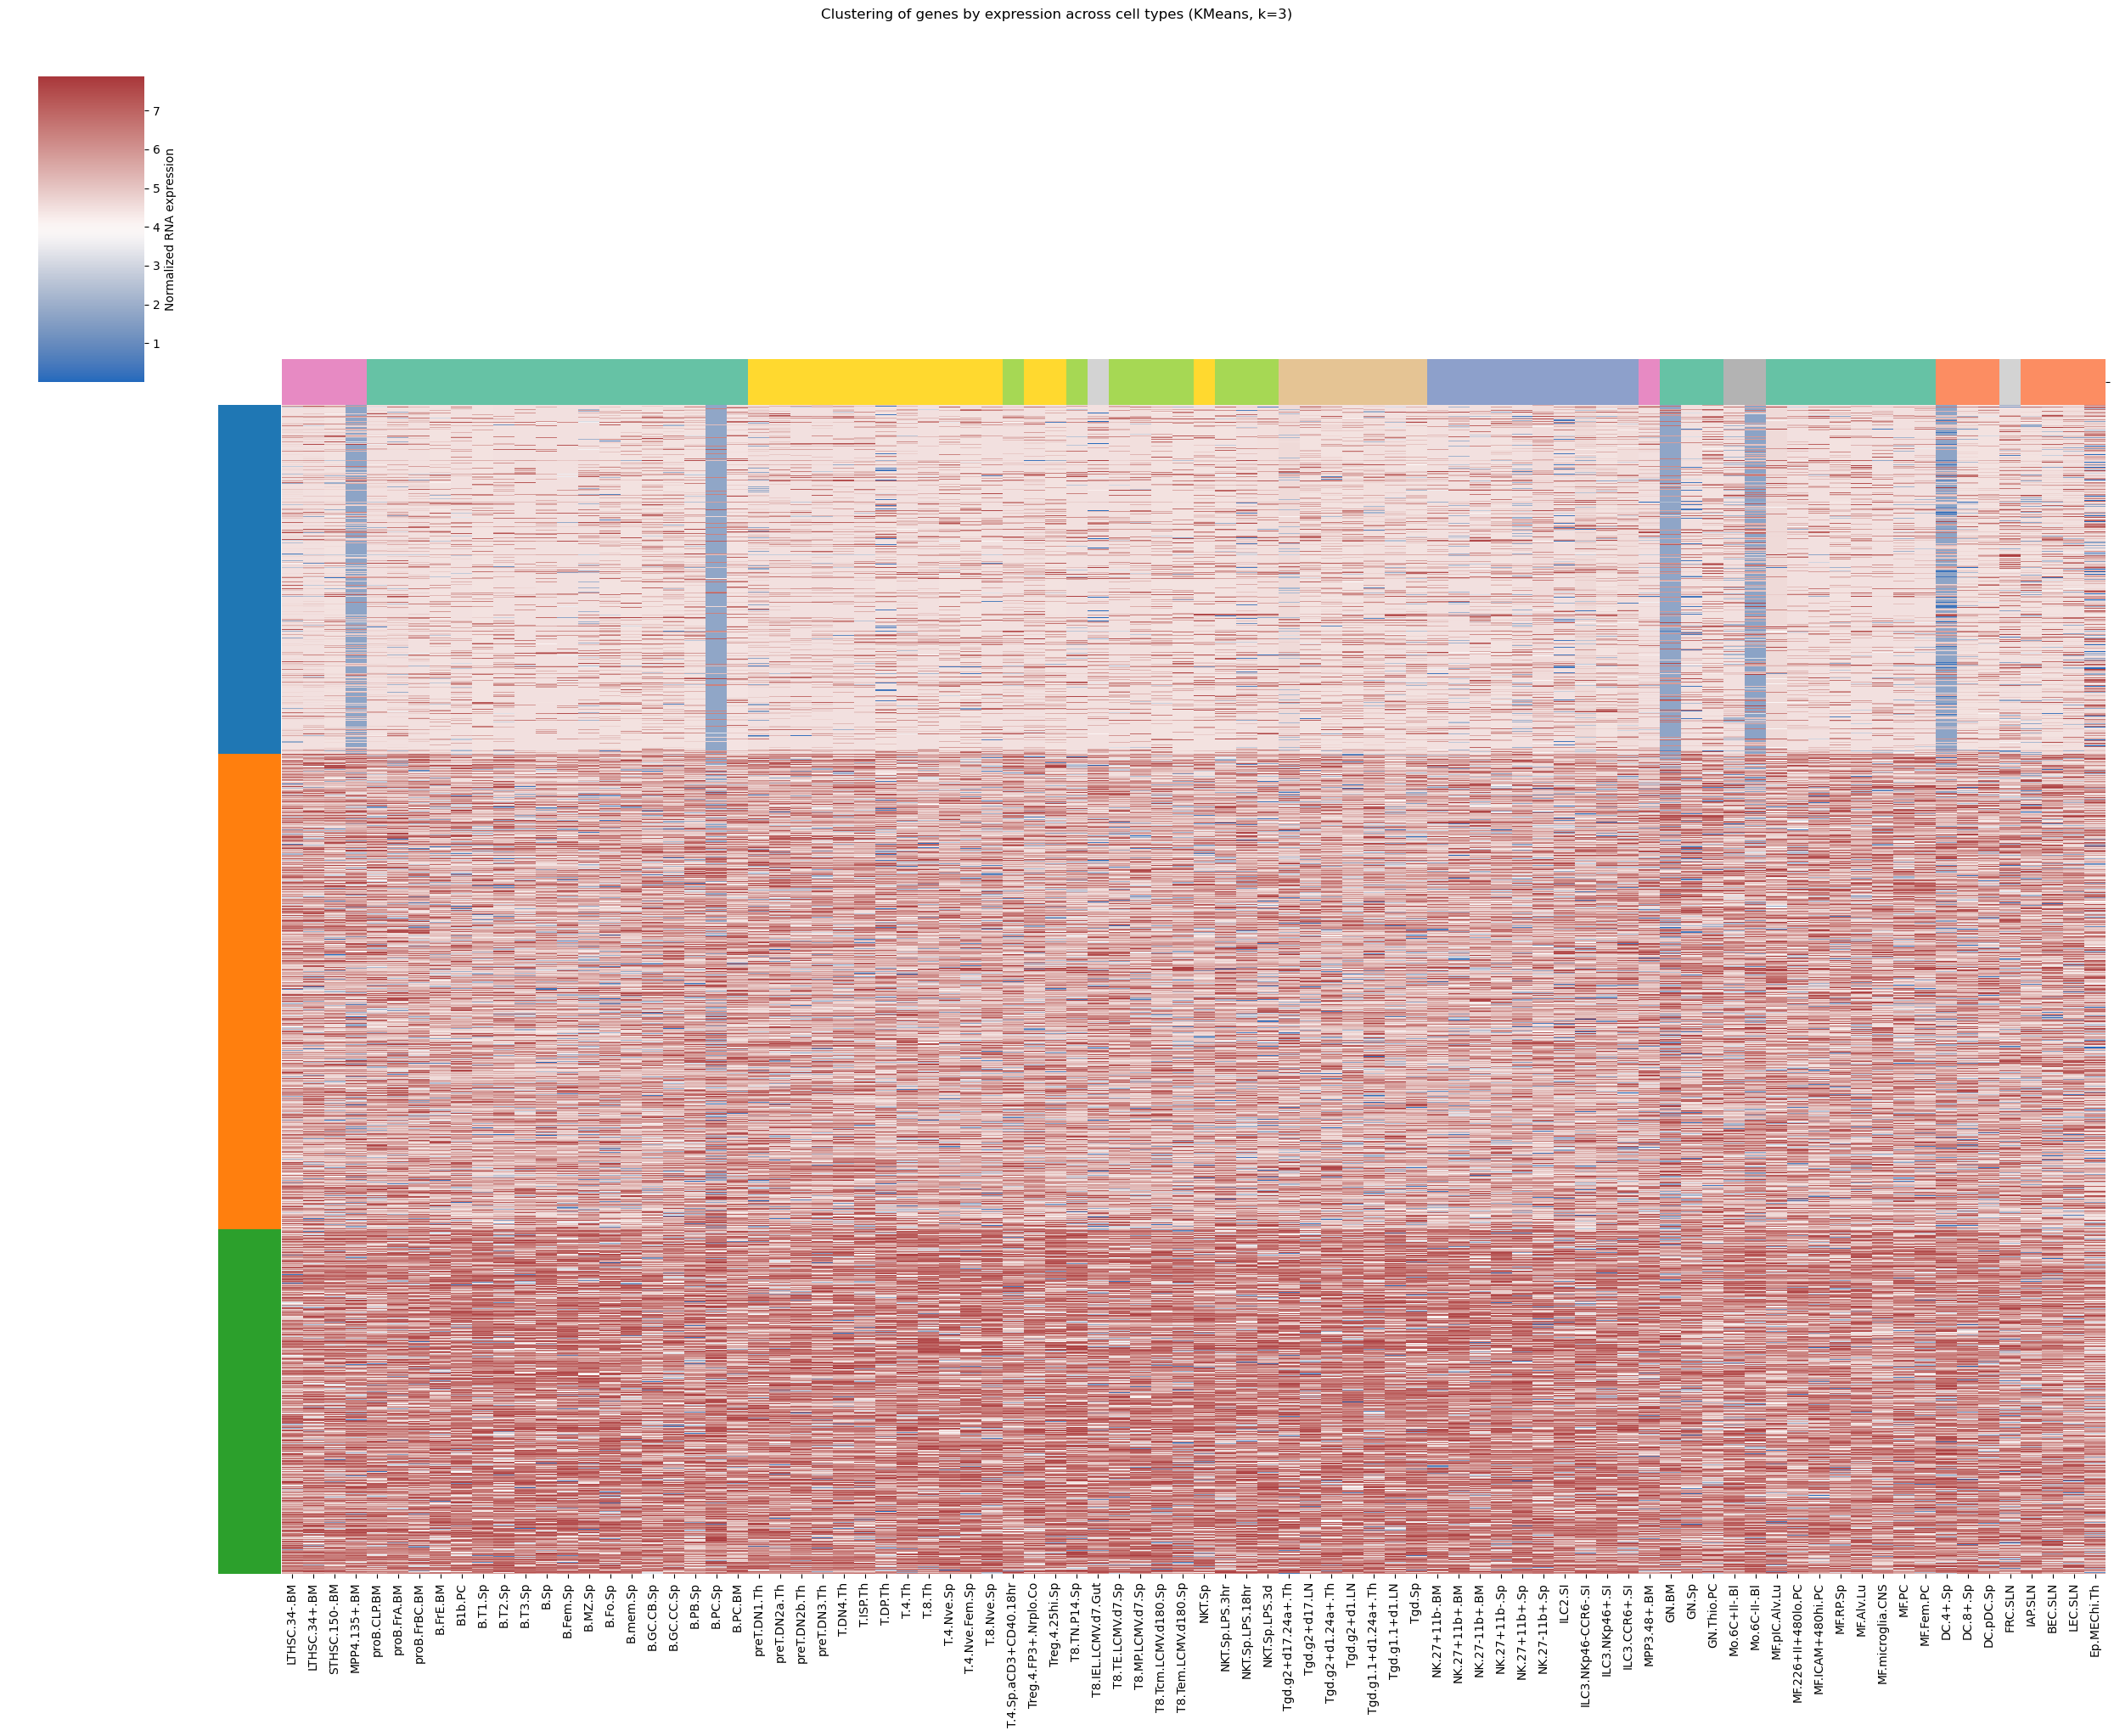

In [26]:
sns.clustermap(
    RNA_sorted,
    cmap="vlag",
    col_cluster=False,    # no column clustering
    row_cluster=False,    # no row clustering because we sorted manually
    col_colors=col_colors,
    row_colors=gene_colors,  # color bars for gene clusters
    yticklabels=False,
    figsize=(25, 20),
    dendrogram_ratio=(.1, .2),
    cbar_kws={'label': 'Normalized RNA expression'}
)

plt.suptitle("Clustering of genes by expression across cell types (KMeans, k=3)", y=1.02)
plt.show()


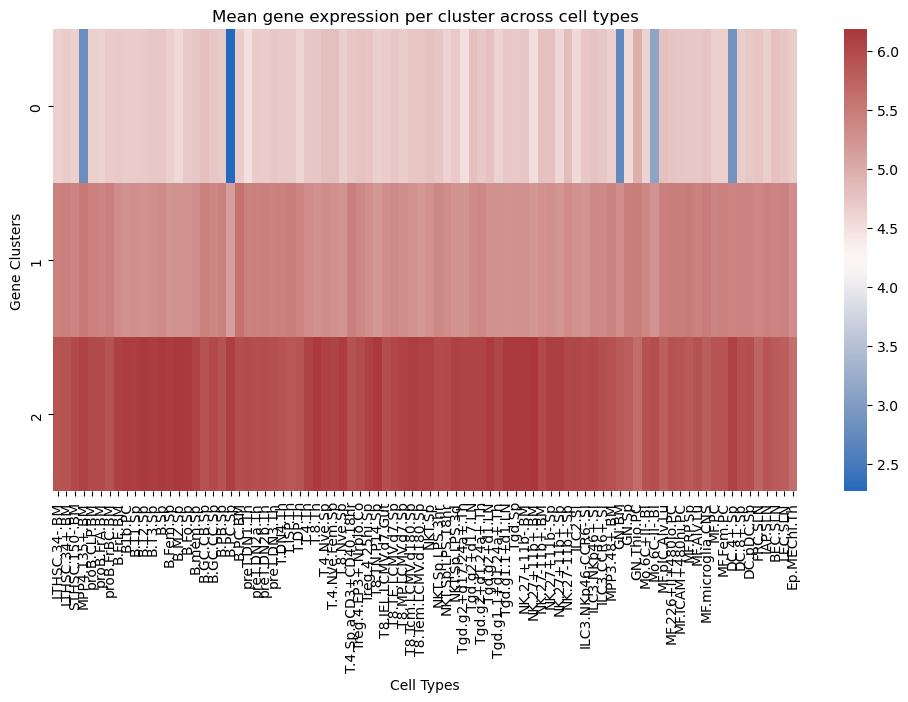

In [27]:
# Add cluster labels as a new column
RNA_clustered = RNA_noramlized.copy()
RNA_clustered['cluster'] = cluster_labels

# Calculate mean expression per cluster (averaged over genes in cluster)
mean_expr_per_cluster = RNA_clustered.groupby("cluster").mean()

plt.figure(figsize=(12, 6))
sns.heatmap(mean_expr_per_cluster, cmap="vlag", xticklabels=True)
plt.xlabel("Cell Types")
plt.ylabel("Gene Clusters")
plt.title("Mean gene expression per cluster across cell types")
plt.show()

In [28]:
target_lineage = "B"  

# Identify cell types of the target lineage
target_celltypes = [ct for ct in RNA_noramlized.columns if celltype_to_lineage.get(ct, "") == target_lineage]

# Calculate mean expression in target lineage vs other cell types for each cluster
cluster_means = RNA_clustered.groupby("cluster")[target_celltypes].mean().mean(axis=1)
cluster_background = RNA_clustered.groupby("cluster").mean().drop(columns=target_celltypes).mean(axis=1)

# Log2 fold-change of expression
log2_fc = np.log2((cluster_means + 1e-9) / (cluster_background + 1e-9))

# Sort clusters by enrichment
log2_fc.sort_values(ascending=False, inplace=True)

print("Cluster enrichment for lineage:", target_lineage)
print(log2_fc)


Cluster enrichment for lineage: B
cluster
2    0.018762
1   -0.004820
0   -0.013049
dtype: float64


Cluster 2 has biggest B-cell enrichtment. 

In [29]:
# Identify the top enriched cluster (highest log2 FC)
top_cluster = log2_fc.index[0]

# Extract marker genes from this cluster
marker_genes = RNA_clustered[RNA_clustered['cluster'] == top_cluster].index.tolist()
print(f"Number of marker genes in cluster {top_cluster}: {len(marker_genes)}")


Number of marker genes in cluster 2: 5171


#### Boxplot: Comparing expression in B-cells vs other lineages per gene cluster

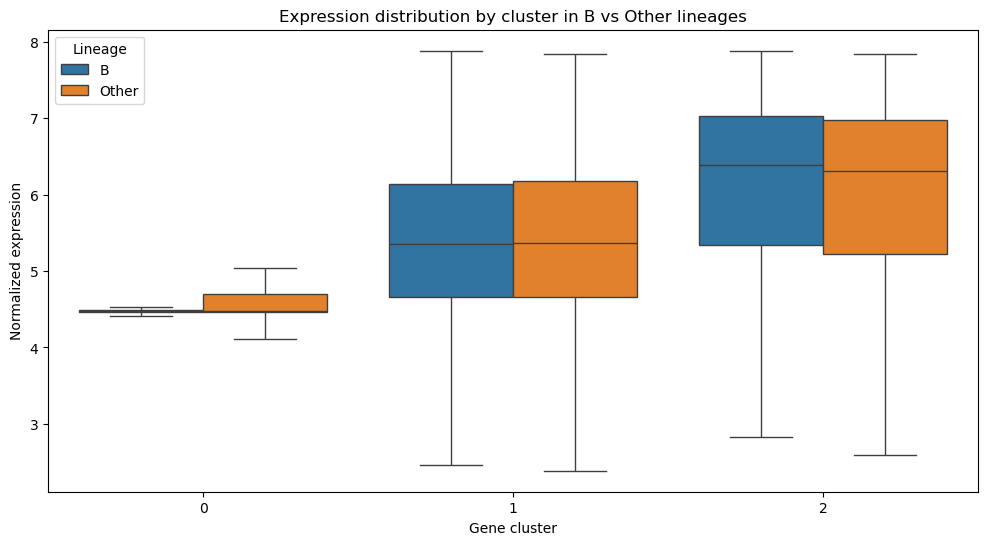

In [30]:
other_celltypes = [ct for ct in RNA_noramlized.columns if ct not in target_celltypes]

plot_data = []
for cluster_id, group in RNA_clustered.groupby("cluster"):
    expr_target = group[target_celltypes].values.flatten()
    expr_others = group[other_celltypes].values.flatten()
    
    plot_data.extend([
        {"cluster": cluster_id, "lineage": target_lineage, "expression": val} for val in expr_target
    ])
    plot_data.extend([
        {"cluster": cluster_id, "lineage": "Other", "expression": val} for val in expr_others
    ])

plot_df = pd.DataFrame(plot_data)

plt.figure(figsize=(12, 6))
sns.boxplot(x="cluster", y="expression", hue="lineage", data=plot_df, showfliers=False)
plt.title(f"Expression distribution by cluster in {target_lineage} vs Other lineages")
plt.ylabel("Normalized expression")
plt.xlabel("Gene cluster")
plt.legend(title="Lineage")
plt.show()


Cluster 2 may show biggest B-cell enrichment but it is not significant. 

### b. Are there subclusters of special interest?

In [31]:
# 2 subcluster pro KMeans-Cluster 
n_subclusters = 2

# DataFrame to save information about subcluster
subcluster_assignments = pd.Series(index=RNA_noramlized.index, dtype=int)

for cluster_id in np.unique(labels_3):
    # Genes in KMeans-Cluster
    genes_in_cluster = RNA_noramlized.index[labels_3 == cluster_id]
    data_subset = RNA_noramlized.loc[genes_in_cluster]
    
    # Hierarchical Clustering (Ward) of genes within clusters
    linkage_matrix = linkage(data_subset, method='ward')
    subclusters = fcluster(linkage_matrix, t=n_subclusters, criterion='maxclust')
    
    # Subcluster IDs for all KMeans-Cluster
    subcluster_ids = subclusters + cluster_id * n_subclusters
    
    subcluster_assignments.loc[genes_in_cluster] = subcluster_ids

# subcluster as DataFrame with KMeans-Cluster
cluster_df = pd.DataFrame({
    'kmeans_cluster': labels_3,
    'subcluster': subcluster_assignments
}, index=RNA_noramlized.index)


/opt/miniconda3/envs/envBCells1/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/opt/miniconda3/envs/envBCells1/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


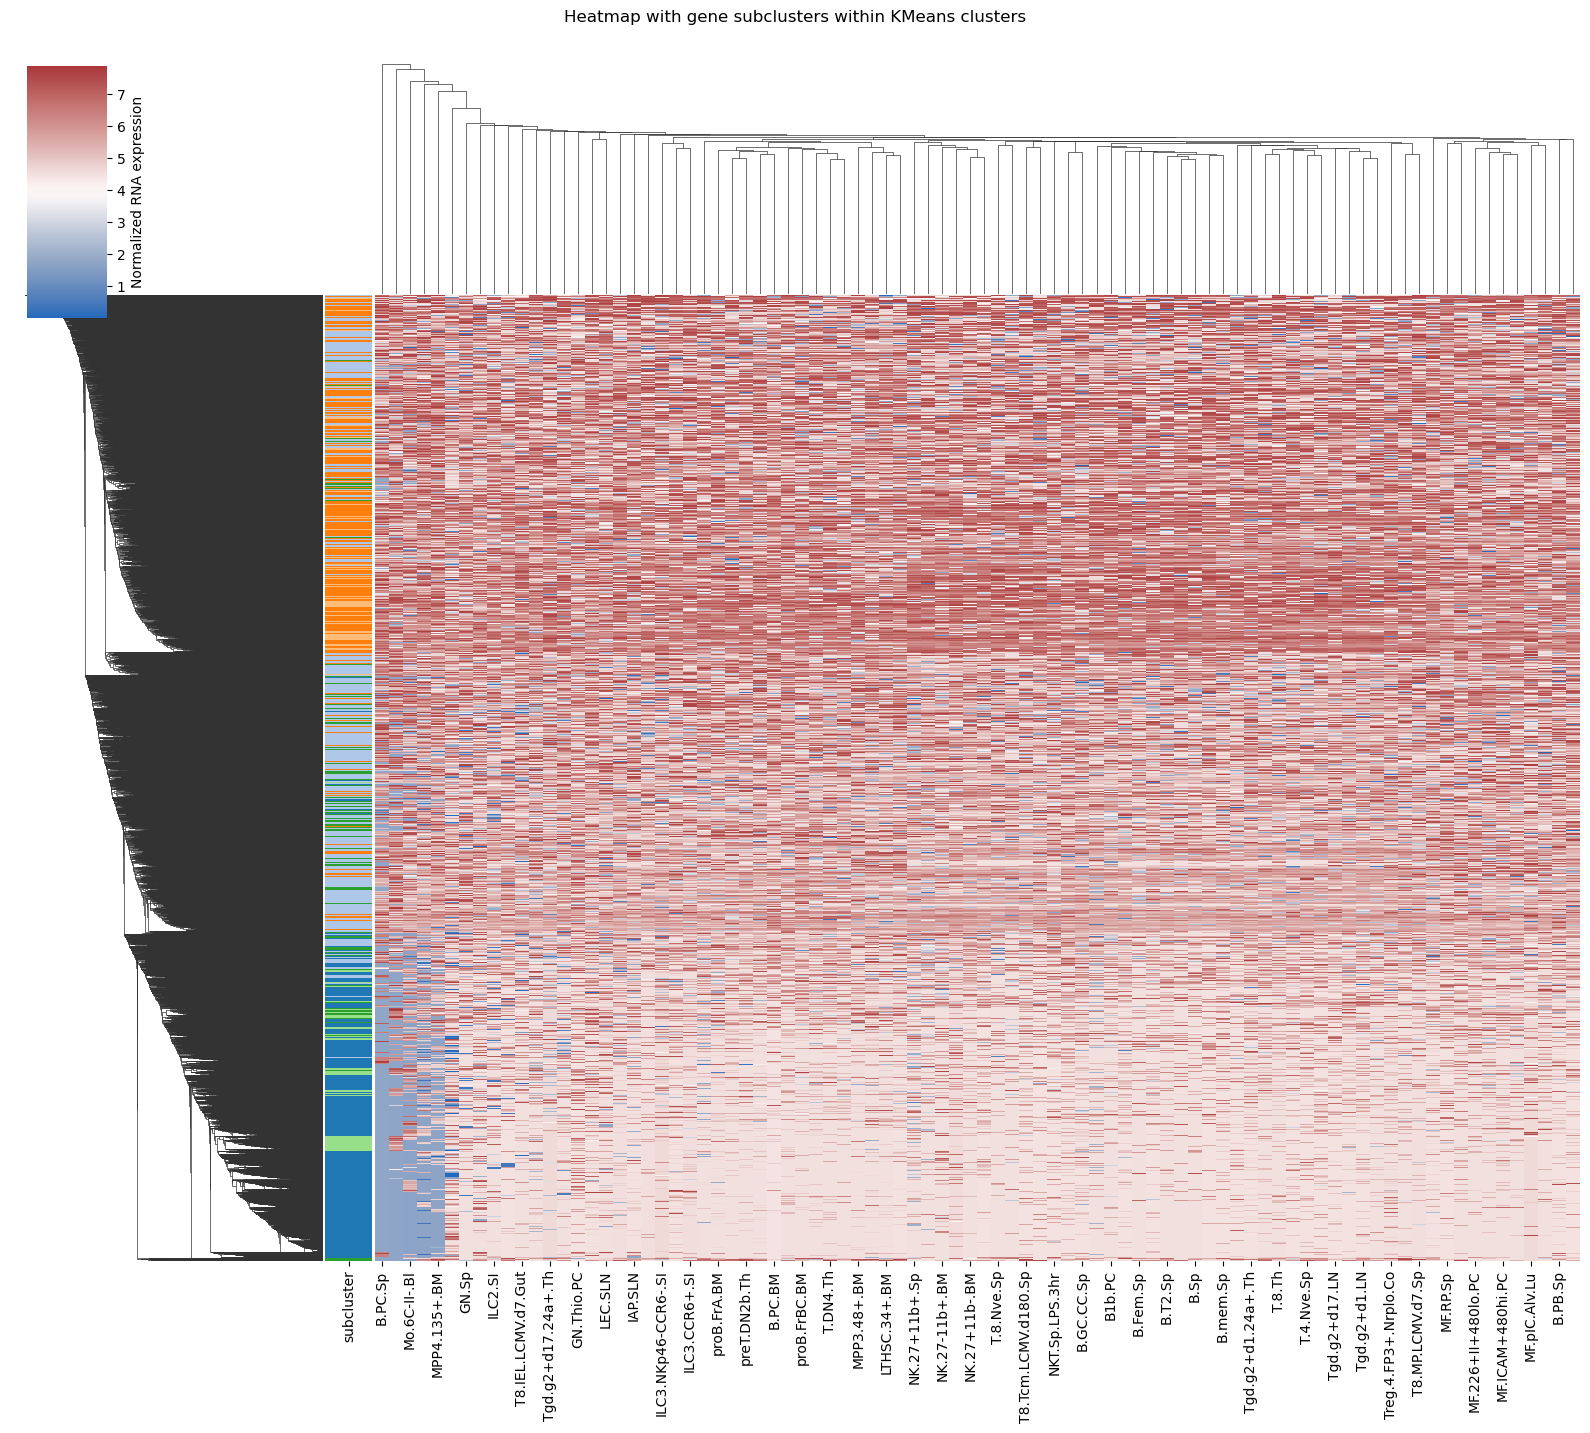

In [32]:
# palette für Subcluster 
unique_subclusters = cluster_df['subcluster'].unique()
colors_subclusters = sns.color_palette("tab20", len(unique_subclusters))
subcluster_color_map = dict(zip(unique_subclusters, colors_subclusters))
row_colors = cluster_df['subcluster'].map(subcluster_color_map)

# Heatmap
sns.clustermap(
    RNA_noramlized,
    cmap="vlag",
    col_cluster=True,  
    row_cluster=True,  
    row_colors=row_colors,
    figsize=(16, 14),
    yticklabels=False,
    cbar_kws={'label': 'Normalized RNA expression'}
)
plt.suptitle("Heatmap with gene subclusters within KMeans clusters", y=1.02)
plt.show()


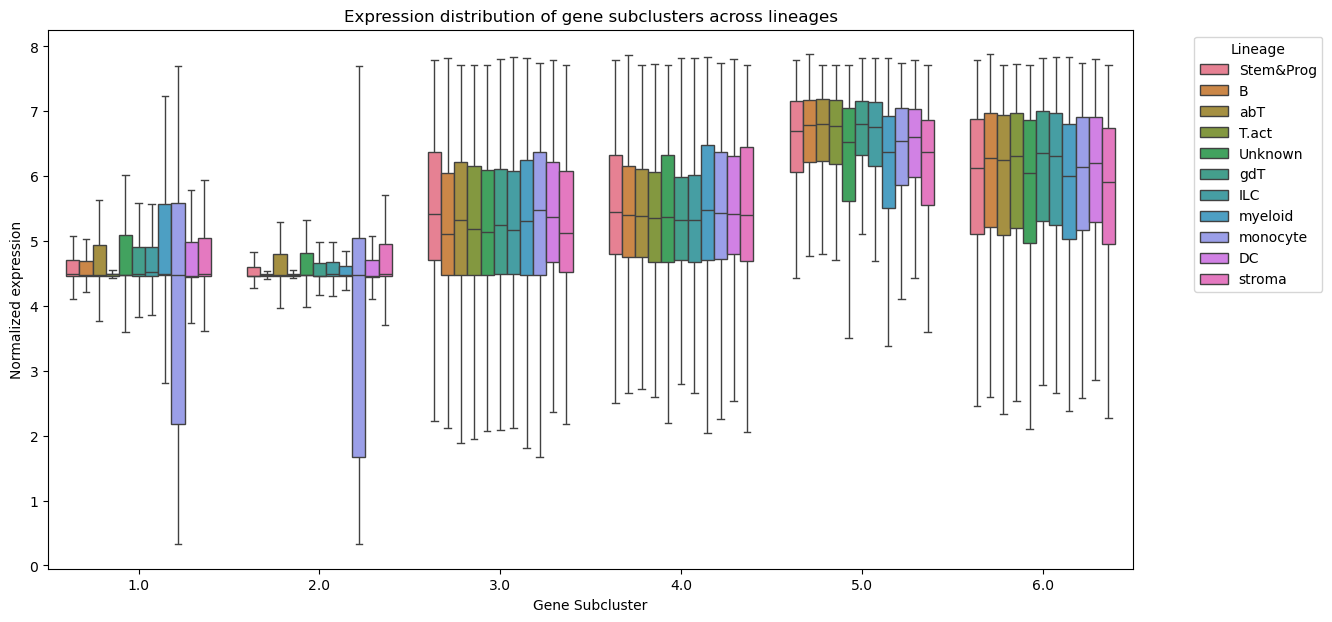

In [33]:
# Add subcluster assignment to the genes
RNA_subclustered = RNA_noramlized.copy()
RNA_subclustered['subcluster'] = cluster_df['subcluster']

# DataFrame for boxplot
plot_data = []

for subclust_id, group in RNA_subclustered.groupby('subcluster'):
    for ct in RNA_noramlized.columns:
        expr_values = group[ct].values
        for val in expr_values:
            plot_data.append({
                'subcluster': subclust_id,
                'cell_type': ct,
                'expression': val,
                'lineage': celltype_to_lineage.get(ct, 'Unknown')
            })

plot_df = pd.DataFrame(plot_data)

plt.figure(figsize=(14, 7))
sns.boxplot(x='subcluster', y='expression', hue='lineage', data=plot_df, showfliers=False)
plt.title("Expression distribution of gene subclusters across lineages")
plt.xlabel("Gene Subcluster")
plt.ylabel("Normalized expression")
plt.legend(title="Lineage", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


There are also no sublucters of special interest. 

##  iii. Can one use correlation analysis and distance information to associate ATAC-seq regions with gene expression?

###  a) Where are associated CREs located with respect to the TSS?